In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
plt.close('all')

In [2]:
# Import CSV
data = pd.read_csv("original.csv", sep=';', decimal=",", encoding = "ISO-8859-1", error_bad_lines=False)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,6,7,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Display database
display(data)

,ID_Cliente,ID_Contrato,ID_Reserva,Regiao_Abertura,Regiao_Fechamento,Data_Criacao_Reserva,Data_Prevista_Retirada_Reserva,Data_Prevista_Devolucao_Reserva,Data_Abertura_Efetiva,Data_Fechamento_Efetiva,...,Categoria_Cobrada,Categoria_Utilizada,Canal_Origem,Categoria_Cliente,Sexo,Data_Nascimento,Cliente_Desde,País_Residencia,Estado_Residencia,Cidade_Residencia
0,84737,113654,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-03 10:07:00,2017-01-08 04:36:00,...,Basico,Basico,Balcao,Verde,M,1987-06-29,2017-01-03,BRASIL,DISTRITO FEDERAL,BRASILIA
1,76191,983884,NaN,Zion,Zion,NaN,NaN,NaN,2017-02-18 06:25:00,2017-02-24 14:23:00,...,Basico,Basico,Balcao,Verde,F,1984-07-21,2017-02-18,BRASIL,SANTA CATARINA,SOMBRIO
2,85008,312145,NaN,Zion,Zion,NaN,NaN,NaN,2017-04-07 08:33:00,2017-04-10 08:49:00,...,Basico,Basico,Balcao,Verde,M,1936-11-29,2017-03-28,BRASIL,SANTA CATARINA,BALNEARIO GAIVOTA
3,430197,52525,NaN,Tatooine,Tatooine,NaN,NaN,NaN,2017-06-09 22:38:00,2017-06-19 13:17:00,...,Luxo,Luxo,Balcao,Platinum,M,1987-09-28,2012-08-24,BRASIL,MINAS GERAIS,BELO HORIZONTE
4,411463,515813,NaN,Zion,Zion,NaN,NaN,NaN,2017-08-17 14:50:00,2017-08-30 14:44:00,...,Utilitários,Utilitários,Balcao,Verde,M,1983-04-27,2017-06-28,BRASIL,SANTA CATARINA,SOMBRIO
5,598353,1131302,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-02 15:05:00,2017-01-05 12:48:00,...,Intermediário,Intermediário,Balcao,Verde,M,1980-04-21,2008-06-30,BRASIL,MINAS GERAIS,BELO HORIZONTE
6,564471,89397,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-03 07:45:00,2017-01-05 07:04:00,...,Basico,Basico,Balcao,Verde,M,1955-02-18,2017-01-03,BRASIL,SANTA CATARINA,ARARANGUA
7,627650,1025658,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-03 13:55:00,2017-01-05 14:50:00,...,Basico,Basico,Balcao,Gold,M,1962-08-13,2016-10-14,BRASIL,SANTA CATARINA,TURVO
8,575675,1239031,NaN,Hogsmeade,Hogsmeade,NaN,NaN,NaN,2017-06-26 07:55:00,2017-06-27 10:26:00,...,Intermediário,Intermediário,Balcao,Gold,M,1981-09-26,2005-05-25,BRASIL,GOIAS,GOIANIA
9,34431,672076,NaN,King's Landing,King's Landing,NaN,NaN,NaN,2017-07-13 11:08:00,2017-07-15 09:03:00,...,Utilitários,Utilitários,Balcao,Verde,M,1945-02-17,2008-10-06,BRASIL,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES


In [4]:
# Select only women
women = data[(data['Sexo'] == 'F')]
men = data[(data['Sexo'] == 'M')]

In [8]:
# Store women age

def calculate_age(db):
    item = 'Data_Nascimento'
    now = pd.Timestamp('now')
    db[item] = pd.to_datetime(db[item])
    db[item] = db[item].where(db[item] < now, db[item] -  np.timedelta64(100, 'Y'))
    db['Idade'] = (now - db[item]).astype('<m8[Y]')


calculate_age(women)
calculate_age(men)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

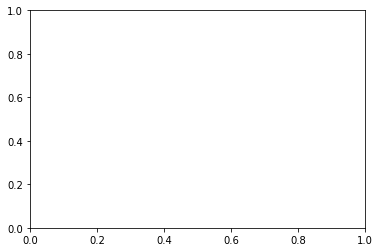

In [12]:
# Get mean invested value grouped by age
# pd.to_numeric(women['Valor_Diarias'])
women_mean_value = women.groupby('Idade', as_index=False)['Valor_Diarias'].mean()
men_mean_value = men.groupby('Idade', as_index=False)['Valor_Diarias'].mean()

# plt.line(men_mean_value['Idade'], [women_mean_value['Valor_Diarias'], men_mean_value['Valor_Diarias']])

x = women["Idade"]
y = women_mean_value
z = men_mean_value

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')

In [46]:
# Filter women by age

women_filtered = women[(women['Idade'] > 22) & (women['Idade'] < 40)]

<BarContainer object of 17 artists>

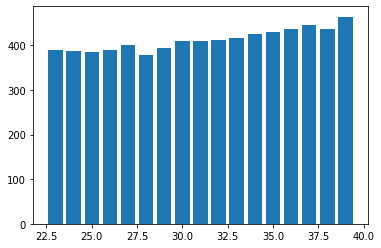

In [48]:
# Get mean invested value grouped by age

filtered_mean_value_by_age = women_filtered.groupby('Idade', as_index=False)['Valor_Diarias'].mean()

plt.bar(filtered_mean_value_by_age['Idade'], filtered_mean_value_by_age['Valor_Diarias'])

In [53]:
display([women_filtered['])

[1           7
 15          1
 28          3
 59          3
 66          4
 81          3
 91          3
 98          2
 128         6
 136         2
 154         2
 155         7
 158         1
 169         4
 176         1
 211         1
 217         1
 221         6
 241         3
 250         2
 313         7
 318         1
 333         1
 335         4
 338         3
 361         2
 365         2
 379         4
 429         2
 436         5
            ..
 1249723     1
 1249735     1
 1249747     4
 1249748     1
 1249752     1
 1249765     6
 1249773    14
 1249777     3
 1249784    12
 1249797     1
 1249803     4
 1249807     2
 1249811     1
 1249827     7
 1249850     4
 1249859     6
 1249863     1
 1249932     3
 1249944     1
 1249962     4
 1249964     4
 1249973     2
 1249977     3
 1249979     3
 1249984     2
 1250004     3
 1250006     9
 1250013     1
 1250014     3
 1250021     3
 Name: Diarias_Utilizadas, Length: 102308, dtype: int64]